# Import Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

In [2]:
# Load data
df = pd.read_csv("../output/flights_cleaned.csv")

# EDA

In [3]:
# --- 1. Basic Overview ---
print("=== Shape & Data Types ===")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\nData Types:\n", df.dtypes)

=== Shape & Data Types ===
Rows: 2189515, Columns: 25

Data Types:
 MONTH                         int64
DAY                           int64
AIRLINE                      object
ORIGIN_AIRPORT               object
DESTINATION_AIRPORT          object
SCHEDULED_TIME              float64
Flight_Status                 int64
CANCELLATION_REASON          object
AIR_SYSTEM_DELAY            float64
SECURITY_DELAY              float64
AIRLINE_DELAY               float64
LATE_AIRCRAFT_DELAY         float64
WEATHER_DELAY               float64
DISTANCE                      int64
IATA_CODE                   float64
ORIGIN_AIRPORT_NAME          object
DESTINATION_AIRPORT_NAME     object
ORIGIN_CITY                  object
ORIGIN_STATE                 object
ORIGIN_LAT                  float64
ORIGIN_LON                  float64
DESTINATION_CITY             object
DESTINATION_STATE            object
DEST_LAT                    float64
DEST_LON                    float64
dtype: object



=== Target Distribution (Flight_Status) ===
0    0.98038
1    0.01962
Name: Flight_Status, dtype: float64


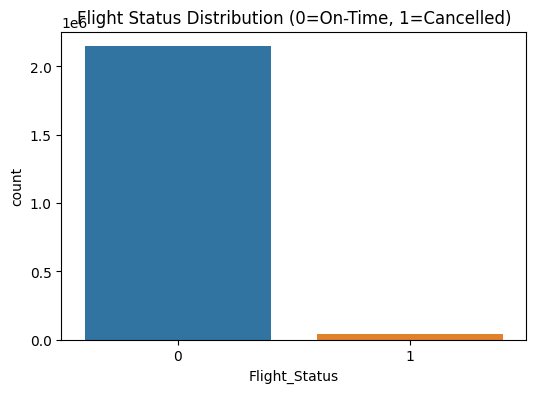

In [4]:
# --- 2. Target Analysis (Flight_Status) ---
print("\n=== Target Distribution (Flight_Status) ===")
status_counts = df['Flight_Status'].value_counts(normalize=True)
print(status_counts)
plt.figure(figsize=(6, 4))
sns.countplot(x='Flight_Status', data=df)
plt.title("Flight Status Distribution (0=On-Time, 1=Cancelled)")
plt.show()

**Confirm class imbalance (98% vs. 2%).**


=== Cancellation Reasons ===
NaN    2146556
B        24330
A        11555
C         7046
D           28
Name: CANCELLATION_REASON, dtype: int64


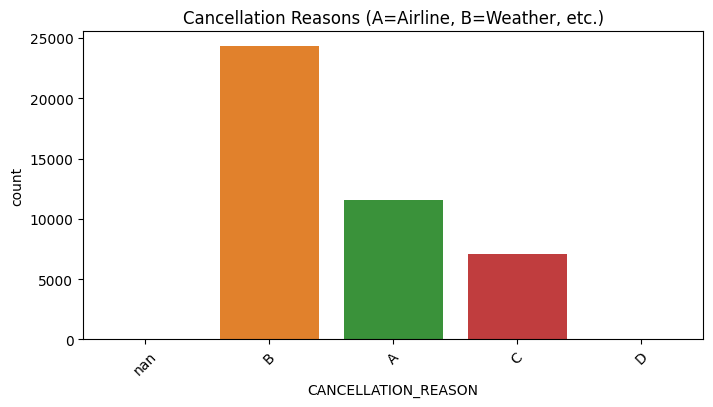

In [5]:
# --- 3. Cancellation Reasons (Conditional EDA) ---
if 'CANCELLATION_REASON' in df.columns:
    print("\n=== Cancellation Reasons ===")
    reason_counts = df['CANCELLATION_REASON'].value_counts(dropna=False)
    print(reason_counts)
    plt.figure(figsize=(8, 4))
    sns.countplot(x='CANCELLATION_REASON', data=df, order=reason_counts.index)
    plt.title("Cancellation Reasons (A=Airline, B=Weather, etc.)")
    plt.xticks(rotation=45)
    plt.show()

**Identify B (Weather) as the top cause.**

In [7]:
delay_cols = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 
                'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
print("\n=== Delay Statistics ===")
df[delay_cols].describe()


=== Delay Statistics ===


,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,525227.000000,525227.000000,525227.000000,525227.000000,525227.000000
mean,8.507143,0.087315,16.976138,27.765656,2.873133
std,19.639771,2.229644,36.859579,40.747490,19.954493
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,4.000000,14.000000,0.000000
75%,10.000000,0.000000,20.000000,39.000000,0.000000
max,643.000000,221.000000,1323.000000,1174.000000,819.000000


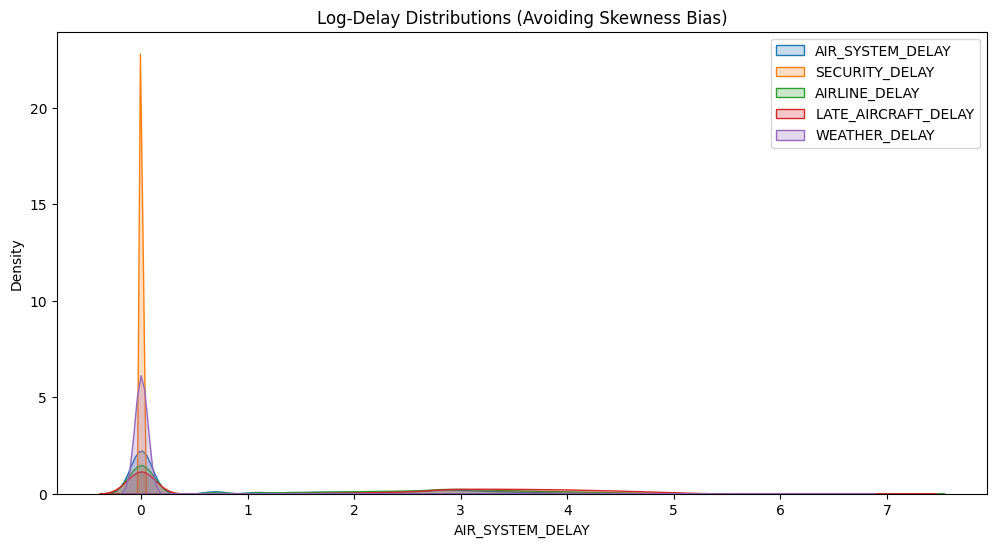

In [8]:
# Plot delay distributions (log-scale for readability)
plt.figure(figsize=(12, 6))
for col in delay_cols:
    sns.kdeplot(np.log1p(df[col]), label=col, fill=True)
plt.title("Log-Delay Distributions (Avoiding Skewness Bias)")
plt.legend()
plt.show()


In [9]:
# --- 5. Geographic Hotspots ---
print("\n=== Top Cancellation Airports ===")
cancelled_flights = df[df['Flight_Status'] == 1]
top_10_origin = cancelled_flights['ORIGIN_AIRPORT'].value_counts().head(10)
print(top_10_origin)




=== Top Cancellation Airports ===
ORD    6040
DFW    5080
LGA    2052
EWR    1936
ATL    1920
BWI    1556
MDW    1524
SFO    1456
DEN    1424
IAH    1376
Name: ORIGIN_AIRPORT, dtype: int64


**Airports like ORD, ATL and DFW have high cancellations.**


=== Cancellations by Month ===


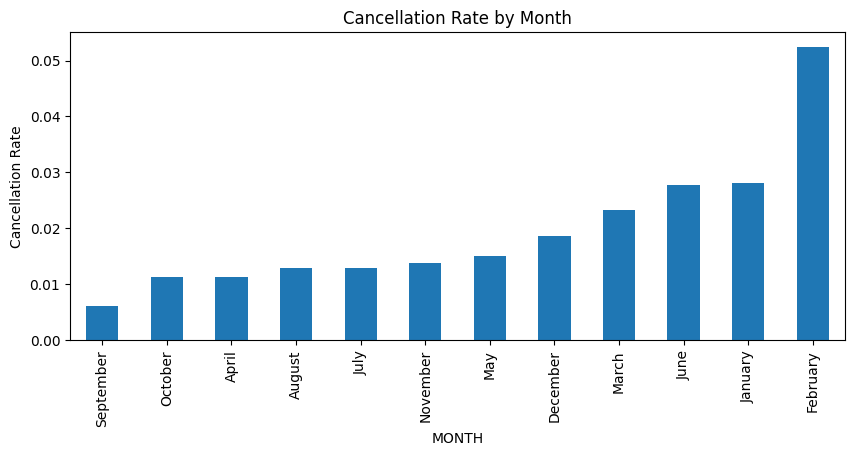

In [10]:
# --- 6. Temporal Trends ---
print("\n=== Cancellations by Month ===")
df['MONTH'] = pd.to_datetime(df['MONTH'], format='%m').dt.month_name()
monthly_cancellations = df.groupby('MONTH')['Flight_Status'].mean().sort_values()
monthly_cancellations.plot(kind='bar', figsize=(10, 4))
plt.title("Cancellation Rate by Month")
plt.ylabel("Cancellation Rate")
plt.show()